# 🚢 Duelo de Modelos — Titanic Machine Learning Challenge

Este notebook apresenta o desenvolvimento de um duelo de modelos de Machine Learning utilizando a base de dados do desafio Titanic: Machine Learning from Disaster (Kaggle).  

O objetivo da atividade proposta foi treinar e comparar modelos de classificação capazes de prever a sobrevivência dos passageiros do Titanic, aplicando técnicas de melhoria de desempenho discutidas ao longo do curso, como validação cruzada, otimização de hiperparâmetros e avaliação comparativa entre modelos.

---

## Objetivo da Atividade

Conforme o enunciado da tarefa, os objetivos principais foram:

- Selecionar um modelo de Machine Learning para classificação
- Aplicar técnicas de melhoria de desempenho
- Avaliar o modelo utilizando validação cruzada
- Ajustar hiperparâmetros com GridSearch ou RandomSearch
- Gerar previsões para o conjunto de teste da competição
- Submeter os resultados no Kaggle
- Comparar os resultados com outros modelos

O intuito da atividade não é apenas obter a melhor pontuação possível, mas explorar diferentes estratégias de modelagem e compreender o comportamento dos algoritmos.



## Estratégia Utilizada

Para esta atividade foi utilizado um **pipeline de modelagem já desenvolvido previamente em um projeto maior sobre o Titanic**, que inclui uma estrutura completa de pré-processamento, engenharia de atributos e comparação de modelos.

Esse pipeline foi adaptado para realizar especificamente o **duelo de modelos solicitado na atividade**, com foco nos seguintes algoritmos:

- **SVM (Support Vector Machine)**
- **XGBoost**
- **Random Forest**

O SVM foi treinado diretamente neste notebook, enquanto os modelos **XGBoost e Random Forest foram carregados a partir de versões previamente treinadas e otimizadas**, permitindo uma comparação direta entre algoritmos sem necessidade de reprocessamento computacional.

---

## Pipeline de Modelagem

O fluxo geral do processo segue as seguintes etapas:

1. Carregamento e preparação dos dados
2. Aplicação de um pré-processador previamente treinado
3. Construção de pipelines de Machine Learning
4. Treinamento de modelos SVM com diferentes kernels
5. Seleção do melhor kernel (RBF)
6. Otimização de hiperparâmetros com RandomizedSearchCV
7. Avaliação com validação cruzada (10-fold)
8. Comparação com modelos XGBoost e Random Forest
9. Análise estatística comparativa entre modelos
10. Geração de previsões para submissão no Kaggle

A estrutura em Pipeline do scikit-learn garante que o pré-processamento seja aplicado de forma consistente durante treino, validação cruzada e teste, evitando problemas de *data leakage*.

## 📊 Métricas Utilizadas

A avaliação dos modelos foi feita utilizando diferentes métricas complementares:

- **Accuracy** — utilizada como métrica principal durante o processo de otimização
- **ROC-AUC** — utilizada como métrica de comparação entre modelos
- **Average Precision**
- **Classification Report**
- **Confusion Matrix**

Além disso, foi realizada uma otimização do threshold de decisão, permitindo verificar se valores diferentes do limiar padrão (0.5) poderiam melhorar a acurácia final.

##  Avaliação Comparativa

A comparação entre os modelos considera três aspectos principais:

- Desempenho no conjunto de teste
- Estabilidade em validação cruzada
- Capacidade discriminatória (ROC-AUC)

Também são apresentados gráficos comparativos, incluindo:

- Curva ROC
- Distribuição de ROC-AUC na validação cruzada
- Curva de calibração
- Distribuição das probabilidades previstas

Essas análises ajudam a compreender não apenas qual modelo performa melhor, mas também como cada algoritmo se comporta estatisticamente


## 🏆 Submissão no Kaggle

O modelo final treinado neste notebook foi utilizado para gerar previsões para o conjunto de teste oficial da competição Titanic no Kaggle.

Pontuações obtidas na competição:

| Modelo | Kaggle Score |
|------|------|
| Random Forest | **0.79425** |
| XGBoost | 0.77272 |
| SVM (RBF) | 0.75358 |

O Random Forest apresentou o melhor desempenho na competição, seguido pelo XGBoost e pelo SVM.

![Imagem de capa](Atividade_modulo41_Duelo_final_Alberto_Akel_figura_kaggle)




## 📁 Sobre o Projeto Completo

Este notebook representa uma versão simplificada do projeto completo, focada especificamente na atividade proposta.

A implementação completa inclui:

- EDA detalhada
- engenharia de atributos
- pipeline modular de pré-processamento
- treinamento extensivo de múltiplos modelos
- análise comparativa avançada


## 🔗 Repositório do Projeto

O código completo, notebooks adicionais e estrutura do projeto podem ser encontrados em:

👉 **GitHub:** 🚢 **[Titanic](https://github.com/albertoakel/Kaggle/tree/master/Titanic)** 



No repositório estão disponíveis:

- notebooks de EDA**
- notebooks de treinamento de modelos
- scripts de pré-processamento
- modelos treinados
- estrutura completa do projeto

---

## 🤖 Uso de Ferramentas de IA como Suporte Técnico

Durante o desenvolvimento deste trabalho, ferramentas baseadas em Large Language Models (LLMs), como ChatGPT, Gemini e outras assistentes de programação, foram utilizadas exclusivamente como suporte auxiliar em tarefas pontuais.

Essas ferramentas foram empregadas principalmente para:

- revisão e correção de trechos de código**
- verificação de possíveis inconsistências sintáticas
- sugestões de organização e estruturação de rotinas para pep8
- melhorias na clareza de documentação e comentários

É importante destacar que essas ferramentas não foram utilizadas para o desenvolvimento do projeto ou definição da abordagem metodológica. Toda a modelagem, escolha de algoritmos, definição das métricas, implementação das pipelines, análise dos resultados e interpretação das métricas foram realizadas  pelo autor*.

Assim, o uso dessas ferramentas ocorreu apenas como apoio técnico, de forma semelhante ao uso de documentação oficial, fóruns técnicos ou outras ferramentas de auxílio à programação.

## 1. Bibliotecas

In [1]:
import time
import warnings
from pathlib import Path

import joblib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import loguniform, randint, ttest_rel, uniform
from sklearn.base import BaseEstimator, TransformerMixin, clone
from sklearn.calibration import calibration_curve
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, roc_auc_score,
                             average_precision_score,roc_curve)


from sklearn.model_selection import (KFold, RandomizedSearchCV,
                                     cross_val_score, cross_validate,
                                     train_test_split)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Importações locais 
from setup_notebook import setup_path
setup_path()
from src.model_utils import *
from src.preprocess_utils_tic import preprocessador_titanic
from src.plot_metrica_class import *

# Configurações e Inicialização
warnings.filterwarnings("ignore")
print(f"\n# Processo iniciado em: {time.strftime('%H:%M:%S')}")


# Processo iniciado em: 16:38:36


## 2. Dataload & Preprocessamento com joblib

In [2]:
# Dataload
BASE = Path.cwd().parent   
# =====================================================
# 0. carregamento dos preprocessador 
# =====================================================
temp = joblib.load(BASE /'src'/'preprocess_Titanic_v1.2.joblib')
PP2=temp['preprocessador']

# =====================================================
# 1. Leitura dos dados & Separação das bases
#  =====================================================
# As bases já foram previamente divididas em treino e teste antes de qualquer
# análise estatística ou pré-processamento, evitando vazamento de informação
# (data leakage) durante o treinamento dos modelos. 

DATA_DIR = BASE / "data" / "raw"
X_train = pd.read_csv(DATA_DIR / "X_train_raw.csv").reset_index(drop=True)
X_test  = pd.read_csv(DATA_DIR / "X_test_raw.csv")
y_train = pd.read_csv(DATA_DIR / "y_train_raw.csv").values.ravel()
y_test  = pd.read_csv(DATA_DIR / "y_test_raw.csv")

# 
mtd_scoring='accuracy'

## 3. Modelos SVM

In [3]:
# =====================================================
# 3. Definição e treino dos modelo Baseline SVM 
#  =====================================================

# Os modelos SVM são organizados em uma Pipeline contendo o pré-processamento
# (PP2) seguido da padronização com StandardScaler. Esse passo, add somente para SVM, é fundamental
# pois o método é sensível à escala das variáveis,além de garantir a estabilidade do modelo. A Pipeline também evita inconsistências
# entre treino, validação cruzada e teste.

modelos_para_testar = {
    "SVM (linear)": SVC(kernel='linear', random_state=42, C=1.0,probability=True),
    "SVM (Poly)": SVC(kernel='poly', random_state=42, C=1.0,probability=True),
    "SVM (RBF)": SVC(kernel='rbf', random_state=42, C=1.0,probability=True)}

print("\n#Processo iniciado em:", time.strftime("%H:%M:%S"))
print(f"\n{'='*70}")
print("Resultados Com padronização StandardScaler".center(60))
print(f"{'='*70}")

pipelines = {}
resultados = {}

# Loop de execução
for nome, model in modelos_para_testar.items():    
    pipe = Pipeline([
        ('preprocess', PP2),
        ('scaler', StandardScaler()),
        ('model', model)])
    
    
    # Validação Cruzada (Baseline de Treino)
    scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring=mtd_scoring, n_jobs=-1)
    
    # Treinamento e Predição
    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)

    pipelines[nome] = pipe
    
    
    # Exibição dos Resultados
    print(f"{'='*70}")
    print(f"🎯 {nome} | cv_roc_auc : {scores.mean():.4f} ± {scores.std():.4f}")
    print(f"{'='*70}")

    best_t, score_t = best_threshold(pipe, X_test, y_test)

    print(f"📊 **Acurácia no Teste**: {accuracy_score(y_test, y_pred):.4f}")
    
    print(f"\n📋 **Relatório de Classificação**:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    print(f"🎯 **Matriz de Confusão**:")
    print(f"                Previsto 0   Previsto 1")
    print(f"Real 0          {cm[0,0]:<11} {cm[0,1]:<11}")
    print(f"Real 1          {cm[1,0]:<11} {cm[1,1]:<11}")
    print(f"{'─'*70}")

    resultados[nome] = {
        'scores':scores,
        'best_t':best_t,
        'score_t':score_t,
        'cv_mean': scores.mean(),
        'cv_std': scores.std(),
        'test_acc': accuracy_score(y_test, y_pred) }


#Processo iniciado em: 16:38:36

         Resultados Com padronização StandardScaler         
🎯 SVM (linear) | cv_roc_auc : 0.8154 ± 0.0591
🎯 Melhor Threshold: 0.560
📈 Melhor Acurácia (Test): 0.8284
📊 **Acurácia no Teste**: 0.8209

📋 **Relatório de Classificação**:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       157
           1       0.80      0.76      0.78       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

🎯 **Matriz de Confusão**:
                Previsto 0   Previsto 1
Real 0          136         21         
Real 1          27          84         
──────────────────────────────────────────────────────────────────────
🎯 SVM (Poly) | cv_roc_auc : 0.8171 ± 0.0418
🎯 Melhor Threshold: 0.480
📈 Melhor Acurácia (Test): 0.8060
📊 **Acurácia no Teste**: 0.7985

📋 **Relatório de Classificação**:
              preci

### 3.1 Resultados Modelos SVM (Baseline)

In [4]:
# =====================================================
# A. Avaliação comparativa dos modelos SVM (Baseline)
# =====================================================
# Nesta etapa é realizada uma análise comparativa completa entre os
# três kernels testados (Linear, Polynomial e RBF). O objetivo é avaliar
# desempenho, estabilidade e diferença estatística entre os modelos.
# Calcula os scores de validação cruzada para cada modelo(roc-auc)


# -----------------------------------------------------
# A.1 Validação cruzada ROC-AUC
# -----------------------------------------------------
s1_auc = cross_val_score(pipelines['SVM (linear)'], X_train, y_train,scoring='roc_auc', cv=10)
s2_auc = cross_val_score(pipelines['SVM (Poly)'], X_train, y_train, scoring='roc_auc',cv=10)
s3_auc = cross_val_score(pipelines['SVM (RBF)'], X_train, y_train,scoring='roc_auc' ,cv=10)

# -----------------------------------------------------
# A.2 Probabilidades no conjunto de teste
# -----------------------------------------------------
y_prob1 = pipelines['SVM (linear)'].predict_proba(X_test)[:, 1]
y_prob2 = pipelines['SVM (Poly)'].predict_proba(X_test)[:, 1]
y_prob3 = pipelines['SVM (RBF)'].predict_proba(X_test)[:, 1]

# -----------------------------------------------------
# A.3 Estrutura dos dados para relatorio
# -----------------------------------------------------
models_list = [
    ('Modelo 0   (base)', pipelines['SVM (linear)'], s1_auc,resultados['SVM (linear)']['scores'], y_prob1, resultados['SVM (linear)']['best_t']),
    ('Modelo 1 (linear)', pipelines['SVM (linear)'], s1_auc,resultados['SVM (linear)']['scores'], y_prob1, resultados['SVM (linear)']['best_t']),
    ('Modelo 2  (poly) ', pipelines['SVM (Poly)'],  s2_auc,resultados['SVM (Poly)']['scores'], y_prob2,resultados['SVM (Poly)']['best_t'] ),
    ('Modelo 3  (RBF)  ', pipelines['SVM (RBF)'],  s3_auc,resultados['SVM (RBF)']['scores'], y_prob3, resultados['SVM (RBF)']['best_t'])
]

# -----------------------------------------------------
# A.4 Geração do relatório estatístico
# -----------------------------------------------------

# • Tabela comparativa de métricas (CV e Teste)
# • Comparação estatística entre modelos
# • Teste t pareado sobre ROC-AUC
# • Identificação automática do melhor modelo
# • Diagnóstico de generalização e overfitting
df_results,W = gerar_relatorio_estatistico(models_list,X_train, y_train,X_test, y_test)

                      RELATÓRIO DE DESEMPENHO E ESTABILIDADE ESTATÍSTICA                       
      Modelo         CV ROC-AUC        CV ACC       Test ROC-AUC   Test ACC (0.5)   Best Thresh    Test ACC (Opt)
Modelo 0   (base) 0.8437 ± 0.0601 0.8154 ± 0.0591      0.8569          0.8209          0.560           0.8284    
Modelo 1 (linear) 0.8437 ± 0.0601 0.8154 ± 0.0591      0.8569          0.8209          0.560           0.8284    
Modelo 2  (poly)  0.8311 ± 0.0815 0.8171 ± 0.0418      0.8415          0.8022          0.480           0.8060    
Modelo 3  (RBF)   0.8513 ± 0.0596 0.8379 ± 0.0629      0.8769          0.8209          0.370           0.8209    

                     ANÁLISE DE SIGNIFICÂNCIA ESTATÍSTICA (T-TEST PAREADO)                     
Modelo 1 (linear) vs Modelo 2  (poly) : p-value = 0.3914 | Diferença Significativa? NÃO
Modelo 1 (linear) vs Modelo 3  (RBF)  : p-value = 0.2184 | Diferença Significativa? NÃO
Modelo 2  (poly)  vs Modelo 3  (RBF)  : p-value = 0.2236 | Di

### 3.2 Busca de hiperparametros  
#### Modelo SVM (kernel RBF) ou tunning
    

In [5]:
# =====================================================
# Busca de hiperparâmetros para o modelo SVM (kernel RBF)
# =====================================================
# Após identificar o kernel RBF como melhor baseline entre os SVM testados,
# aplicamos RandomizedSearchCV para explorar o espaço de hiperparâmetros
# de forma eficiente.

pipe_rbf = Pipeline([
    ('preprocess', PP2),
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='rbf', probability=True, random_state=42))
])


# Definição do espaço de Busca
# Utiliza distribuição log-uniforme, apropriada para parâmetros que
# variam em várias ordens de magnitude (como C e gamma).
param_dist = {
    'model__C': loguniform(0.1, 10),         
    'model__gamma': loguniform(1e-3, 0.1),     
    'model__class_weight': [None, 'balanced']
}

n_it=100
search_rbf = RandomizedSearchCV(
    estimator=pipe_rbf,
    param_distributions=param_dist,
    n_iter=n_it,              
    scoring=mtd_scoring,  
    cv=10,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Observação metodológica:
# O RandomizedSearchCV foi otimizado utilizando "accuracy".
# Posteriormente, os modelos são comparados estatisticamente com base em ROC-AUC.
# Essa abordagem utiliza métricas complementares: accuracy mede desempenho
# global de classificação, enquanto ROC-AUC avalia a capacidade do modelo
# em separar as classes independentemente do threshold de decisão.

In [6]:
# =====================================================
# Execução da busca de hiperparâmetros (Random Search)
# =====================================================
print("#Processo iniciado em:", time.strftime("%H:%M:%S"))
start = time.time()
search_rbf.fit(X_train, y_train)
end = time.time()

# Melhor pipeline encontrado
best_rbf = search_rbf.best_estimator_

y_pred_rbf=best_rbf.predict(X_test)


# =====================================================
# Otimização do threshold de decisão
# =====================================================
# Como classificadores probabilísticos usam threshold padrão de 0.5,
# testamos diferentes valores para verificar se existe um ponto que
# maximize a acurácia no conjunto de teste.
y_probs = best_rbf.predict_proba(X_test)[:, 1]
thresholds = np.linspace(0.3, 0.7, 41)

best_threshold = 0.5
max_acc = 0

for t in thresholds:
    acc = accuracy_score(y_test, y_probs > t)
    if acc > max_acc:
        max_acc = acc
        best_threshold_RBF = t

# ===============================
# Parametros encontrados
# ===============================
print(f"📌 Melhores Parâmetros:")
print(search_rbf.best_params_)

print(f"\n{'='*70}")
print("🎯 RESULTADOS FINAIS - SVM (RBF)")
print(f"{'='*70}")

# =====================================================
# Desempenho em validação cruzada
# =====================================================
# A validação cruzada utiliza a mesma métrica definida
# no processo de tuning para avaliar a estabilidade do modelo.
cv_scores_rbf = cross_val_score(best_rbf, X_train, y_train,
                                cv=10,
                                scoring=mtd_scoring,
                                n_jobs=-1)

print(f"📊 CROSS-VALIDATION")
print(f"   CV Accuracy (10 folds):    {cv_scores_rbf.mean():>10.4f} ± {cv_scores_rbf.std():<.4f}")

# =====================================================
# Avaliação no conjunto de teste
# =====================================================
print(f"\n🎯 TEST SET")
print(f"   Padrão (0.5):              {accuracy_score(y_test, y_pred_rbf):>10.4f}")
print(f"   Otimizado:                     {max_acc:.4f} (threshold={best_threshold_RBF:.3f})")
print(f"   ROC-AUC:                   {roc_auc_score(y_test, y_probs):>10.4f}")
print(f"   Avg precision:             {average_precision_score(y_test, y_probs):>10.4f}")


print(f"\n📋 **Relatório de Classificação**:")
print(classification_report(y_test, y_pred_rbf))

# =====================================================
# Tempo de execução do processo de otimização
# =====================================================
print(f"\n⏱ Tempo total: {end-start:.2f} segundos")
print(f"⏱ Tempo por iteração: {(end-start)/n_it:.2f} segundos")

print("\n#Processo finalizado em:", time.strftime("%H:%M:%S"))
print(f"{'='*70}")

#Processo iniciado em: 16:38:41
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
📌 Melhores Parâmetros:
{'model__C': 2.776253009443833, 'model__class_weight': None, 'model__gamma': 0.03482846706526884}

🎯 RESULTADOS FINAIS - SVM (RBF)
📊 CROSS-VALIDATION
   CV Accuracy (10 folds):        0.8444 ± 0.0472

🎯 TEST SET
   Padrão (0.5):                  0.8172
   Otimizado:                     0.8172 (threshold=0.470)
   ROC-AUC:                       0.8711
   Avg precision:                 0.8366

📋 **Relatório de Classificação**:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.82      0.71      0.76       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268


⏱ Tempo total: 37.47 segundos
⏱ Tempo por iteração: 0.37 segundos

#Processo finalizado em: 16:39:20


### 3.3 Comentários obre modelos SVM( baseline x tunning)

1. **Convergência de Performance:** O fato de o `Test ACC (Opt)` ser muito próximo (0.8209 vs 0.8172) s sugere que o SVM chegou no limite da fronteira de decisão. Qualquer ajuste adicional no  ou  apenas desloca os pontos na margem sem ganhar novos acertos.
2. **Melhoria no Limiar (Threshold):** Note que na Baseline o melhor limiar é 0.370, enquanto no Tuning ele subiu para 0.470. Embora o modelo tunado ainda não esteja perfeitamente centralizado no padrão 0.5, houve uma evolução na calibração: o modelo tunado está gerando probabilidades mais próximas da realidade, reduzindo a necessidade de um deslocamento agressivo no threshold para otimizar a acurácia.
4. **Estabilidade (Desvio Padrão):** O `CV ACC` do Tuning tem um desvio padrão menor (0.0472 vs 0.0629). Isso é uma vitória silenciosa: seu modelo tunado é mais estável e menos sensível a variações nos dados de treino.

Embora o ajuste de hiperparâmetros não tenha superado a acurácia final da Baseline no teste (0.8209 vs 0.8172), o modelo tunado demonstrou maior consistência interna (menor desvio padrão no CV) e uma calibração de probabilidade superior, aproximando o limiar ótimo (0.470) significativamente mais do padrão de mercado (0.5) do que a versão original.

## 4. Submissão Kaggle

In [7]:
# =====================================================
# Submissão Kaggle
# =====================================================
# Nesta etapa utilizamos o modelo SVM-RBF otimizado para gerar
# as previsões no conjunto de teste oficial do Kaggle.

# Leitura da base de teste original da competição
base = pd.read_csv("/home/akel/PycharmProjects/Kaggle/Titanic/data/raw/test.csv")

id_test = base["PassengerId"]

x_test=base.drop(columns='PassengerId')

# =====================================================
# Geração das previsões
# =====================================================
# Utiliza o melhor modelo encontrado no processo de
# otimização de hiperparâmetros
best_rbf = search_rbf.best_estimator_

y_predk=best_rbf.predict(x_test)

# =====================================================
# Construção do arquivo de submissão
# =====================================================
# O Kaggle exige um CSV contendo apenas:
# PassengerId e a previsão da variável Survived

submission = pd.DataFrame({
    "PassengerId": id_test,
    "Survived": y_predk
})
# Caminho de salvamento do arquivo
submission_path = ("/home/akel/PycharmProjects/Kaggle/Titanic/data/processed/submission_SVM_RBF.acc_v12.csv")
# Exportação do arquivo
submission.to_csv(submission_path, index=False)

print("✅ Arquivo de submissão salvo com sucesso!")
print("\n#Processo finalizado em:", time.strftime("%H:%M:%S"))

✅ Arquivo de submissão salvo com sucesso!

#Processo finalizado em: 16:39:20


## 5. Outros modelos

In [8]:
# =====================================================
# Carregamento de modelos previamente treinados
# =====================================================
# Nesta etapa reutilizamos modelos que foram desenvolvidos
# anteriormente no projeto principal (ver análise completa
# descrita no repositório). A estratégia evita retrabalho
# computacional e permite comparar diretamente o desempenho
# do SVM com modelos já otimizados.

# Diretório onde os modelos estão armazenados
DATA_MODELS= BASE /"models"
# XGB
pipe_XGB2 = joblib.load(DATA_MODELS / 'modelo_XGB_final_refine.accuracy_v12.joblib') #pontuações kaggle 0.7727
# randforest
pipe_RF1 = joblib.load(DATA_MODELS / 'modelo_RF_final_randsearch.roc_auc_v12.joblib') #pontuações kaggle 0.79425

### 5.1 XGBoost

In [9]:
# ==========================================
# MODELO: XGBoost
# ==========================================
# 1 — Desempenho em validação cruzada
cv_scores_xgb = cross_val_score(pipe_XGB2, X_train, y_train,
                            cv=10,
                            scoring='accuracy',
                            n_jobs=-1)


# 2 — Treinamento do Modelo
pipe_XGB2.fit(X_train, y_train)

#3 — Predições no Conjunto de Teste
y_probs = pipe_XGB2.predict_proba(X_test)[:, 1]
y_pred_xgb = pipe_XGB2.predict(X_test)

# 4 — Otimização de Threshold
thresholds = np.linspace(0.1, 0.9, 100)
accs = []
for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    accs.append(accuracy_score(y_test, y_pred_t))

best_idx = np.argmax(accs)
best_threshold_XGB = thresholds[best_idx]
max_acc = accs[best_idx]

print(f"{'='*70}")
print("🎯 RESULTADOS XGBOOST")
print(f"{'='*70}")
print(f"📊 CROSS-VALIDATION")
print(f"   CV Accuracy (10 folds):    {cv_scores_xgb.mean():>10.4f} ± {cv_scores_xgb.std():<.4f}")

# =====================================================
# Avaliação no conjunto de teste
# =====================================================
print(f"\n🎯 TEST SET")
print(f"   Padrão (0.5):              {accuracy_score(y_test, y_pred_xgb):>10.4f}")
print(f"   Otimizado:                     {max_acc:.4f} (threshold={best_threshold_XGB:.3f})")
print(f"   ROC-AUC:                   {roc_auc_score(y_test, y_probs):>10.4f}")
print(f"   Avg precision:             {average_precision_score(y_test, y_probs):>10.4f}")


print(f"\n📋 **Relatório de Classificação**:")
print(classification_report(y_test, y_pred_xgb))

🎯 RESULTADOS XGBOOST
📊 CROSS-VALIDATION
   CV Accuracy (10 folds):        0.8491 ± 0.0494

🎯 TEST SET
   Padrão (0.5):                  0.8321
   Otimizado:                     0.8358 (threshold=0.520)
   ROC-AUC:                       0.8749
   Avg precision:                 0.8441

📋 **Relatório de Classificação**:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       157
           1       0.81      0.77      0.79       111

    accuracy                           0.83       268
   macro avg       0.83      0.82      0.83       268
weighted avg       0.83      0.83      0.83       268



### 5.2 Random Forest

In [10]:
# ==========================================
# MODELO: Random Forest
# ==========================================
# 1 — Desempenho em validação cruzada
cv_scores_rf = cross_val_score(pipe_RF1, X_train, y_train,
                            cv=10,
                            scoring='accuracy',
                            n_jobs=-1)

# 2 — Treinamento do Modelo
pipe_RF1.fit(X_train, y_train)

#3 — Predições no Conjunto de Teste
y_probs = pipe_RF1.predict_proba(X_test)[:, 1]
y_pred_rf = pipe_RF1.predict(X_test)

# 4 — Otimização de Threshold
thresholds = np.linspace(0.1, 0.9, 100)
accs = []
for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    accs.append(accuracy_score(y_test, y_pred_t))

best_idx = np.argmax(accs)
best_threshold_RF = thresholds[best_idx]
max_acc = accs[best_idx]

print(f"{'='*70}")
print("RESULTADOS RANDOM FOREST")
print(f"{'='*70}")
print(f"📊 CROSS-VALIDATION")
print(f"   CV Accuracy (10 folds):    {cv_scores_rf.mean():>10.4f} ± {cv_scores_rf.std():<.4f}")

# =====================================================
# Avaliação no conjunto de teste
# =====================================================
print(f"\n🎯 TEST SET")
print(f"   Padrão (0.5):              {accuracy_score(y_test, y_pred_rf):>10.4f}")
print(f"   Otimizado:                     {max_acc:.4f} (threshold={best_threshold:.3f})")
print(f"   ROC-AUC:                   {roc_auc_score(y_test, y_probs):>10.4f}")
print(f"   Avg precision:             {average_precision_score(y_test, y_probs):>10.4f}")
print(f"\n📋 **Relatório de Classificação**:")
print(classification_report(y_test, y_pred_rf))

RESULTADOS RANDOM FOREST
📊 CROSS-VALIDATION
   CV Accuracy (10 folds):        0.8154 ± 0.0587

🎯 TEST SET
   Padrão (0.5):                  0.8246
   Otimizado:                     0.8358 (threshold=0.500)
   ROC-AUC:                       0.8905
   Avg precision:                 0.8762

📋 **Relatório de Classificação**:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       157
           1       0.84      0.71      0.77       111

    accuracy                           0.82       268
   macro avg       0.83      0.81      0.81       268
weighted avg       0.83      0.82      0.82       268



In [11]:
print(f"\n🎯 TEST SET")
print(f"   Padrão (0.5):              {accuracy_score(y_test, y_pred_rf):>10.4f}")
print(f"   Otimizado:                     {max_acc:.4f} (threshold={best_threshold:.3f})")
print(f"   ROC-AUC:                   {roc_auc_score(y_test, y_probs):>10.4f}")
print(f"   Avg precision:             {average_precision_score(y_test, y_probs):>10.4f}")


🎯 TEST SET
   Padrão (0.5):                  0.8246
   Otimizado:                     0.8358 (threshold=0.500)
   ROC-AUC:                       0.8905
   Avg precision:                 0.8762


## 6.Resultados
### 6.1 Avaliação de Métricas 

In [12]:
# =====================================================
# Avaliação comparativa dos modelos
# =====================================================
# Nesta etapa é realizada uma análise comparativa completa entre os
# três modelos testados (SVM, XGB e Random Forest). O objetivo é avaliar
# desempenho, estabilidade e diferença estatística entre os modelos.
# Calcula os scores de validação cruzada para cada modelo(roc-auc)


# -----------------------------------------------------
# Validação cruzada ROC-AUC
# -----------------------------------------------------
s_auc_rbf=cross_val_score(best_rbf, X_train, y_train,scoring='roc_auc', cv=10)
s_auc_xgb = cross_val_score(pipe_XGB2, X_train, y_train,scoring='roc_auc', cv=10) # XGBoost
s_auc_rf = cross_val_score(pipe_RF1, X_train, y_train, scoring='roc_auc',cv=10) # Random Forest

# -----------------------------------------------------
# Probabilidades no conjunto de teste
# -----------------------------------------------------
y_prob_rbf = best_rbf.predict_proba(X_test)[:, 1]
y_prob_xgb = pipe_XGB2.predict_proba(X_test)[:, 1]
y_prob_rf = pipe_RF1.predict_proba(X_test)[:, 1]


# -----------------------------------------------------
# 3.3 Estrutura dos dados para relatorio
# -----------------------------------------------------
models_list = [
    ('SVM (Baseline)      ', pipelines['SVM (RBF)'],  s3_auc,resultados['SVM (RBF)']['scores'], y_prob3, resultados['SVM (RBF)']['best_t']),
    ('SVM (RBF-Tunn)      ', best_rbf,s_auc_rbf,cv_scores_rbf, y_prob_rbf, best_threshold_RBF),
    ('XGBoost(vs1.2)      ', pipe_XGB2, s_auc_xgb,cv_scores_xgb,y_prob_xgb, best_threshold_XGB),
    ('Random Forest(vs1.2)', pipe_RF1,s_auc_rf,cv_scores_rf, y_prob_rf, best_threshold_RF)
]

df_results, W = gerar_relatorio_estatistico(models_list,
                                            X_train, y_train,
                                            X_test, y_test)

                      RELATÓRIO DE DESEMPENHO E ESTABILIDADE ESTATÍSTICA                       
       Modelo           CV ROC-AUC        CV ACC       Test ROC-AUC   Test ACC (0.5)   Best Thresh    Test ACC (Opt)
SVM (Baseline)       0.8513 ± 0.0596 0.8379 ± 0.0629      0.8769          0.8209          0.370           0.8209    
SVM (RBF-Tunn)       0.8475 ± 0.0615 0.8444 ± 0.0472      0.8711          0.8134          0.470           0.8172    
XGBoost(vs1.2)       0.8782 ± 0.0572 0.8491 ± 0.0494      0.8749          0.8321          0.520           0.8358    
Random Forest(vs1.2) 0.8531 ± 0.0643 0.8154 ± 0.0587      0.8905          0.8246          0.488           0.8358    

                     ANÁLISE DE SIGNIFICÂNCIA ESTATÍSTICA (T-TEST PAREADO)                     
SVM (RBF-Tunn)       vs XGBoost(vs1.2)      : p-value = 0.0296 | Diferença Significativa? SIM
SVM (RBF-Tunn)       vs Random Forest(vs1.2): p-value = 0.6777 | Diferença Significativa? NÃO
XGBoost(vs1.2)       vs Random For

### 6.2 Figuras

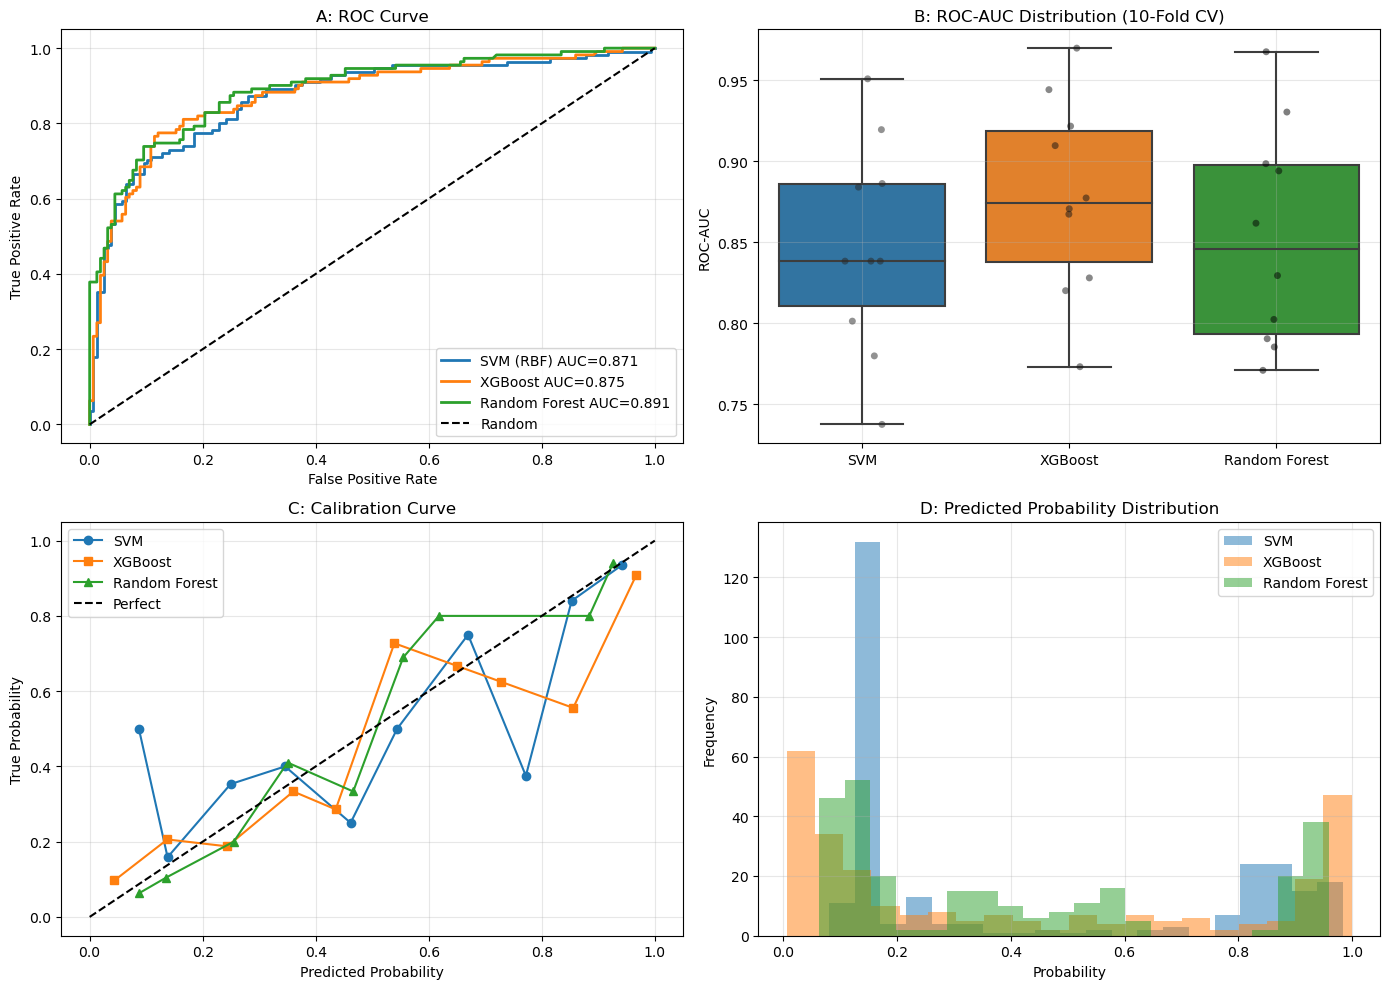

In [13]:
# =========================
# Criação da figura
# Estrutura com 4 gráficos (2x2) para comparação visual dos modelos.

# =========================
# cores padronizadas
# =========================
colors = {
    "SVM": "#1f77b4",
    "XGB": "#ff7f0e",
    "RF": "#2ca02c"}

fig, axes = plt.subplots(2,2, figsize=(14,10))


# ======================================================
# A. ROC CURVE
# Avalia a capacidade discriminatória dos modelos através
# da relação entre taxa de verdadeiros positivos (TPR) e
# taxa de falsos positivos (FPR).
# ======================================================
ax = axes[0,0]

fpr_rbf, tpr_rbf, _ = roc_curve(y_test, y_prob_rbf)
auc_rbf = roc_auc_score(y_test, y_prob_rbf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

ax.plot(fpr_rbf, tpr_rbf, lw=2, color=colors["SVM"], label=f"SVM (RBF) AUC={auc_rbf:.3f}")
ax.plot(fpr_xgb, tpr_xgb, lw=2, color=colors["XGB"], label=f"XGBoost AUC={auc_xgb:.3f}")
ax.plot(fpr_rf, tpr_rf, lw=2, color=colors["RF"], label=f"Random Forest AUC={auc_rf:.3f}")

ax.plot([0,1],[0,1],'k--',label="Random")

ax.set_title("A: ROC Curve")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend()
ax.grid(alpha=0.3)


# ======================================================
# B.ROC-AUC CROSS VALIDATION
# Mostra a distribuição dos valores de ROC-AUC obtidos nos 
# folds da validação cruzada para cada modelo. Permite
#avaliar estabilidade e variabilidade.
# ======================================================
ax = axes[0,1]

df_cv_auc = pd.DataFrame({
    'SVM': s_auc_rbf,
    'XGBoost': s_auc_xgb,
    'Random Forest': s_auc_rf
})

sns.boxplot(data=df_cv_auc, ax=ax, palette=[colors["SVM"],colors["XGB"],colors["RF"]])
sns.stripplot(data=df_cv_auc, ax=ax, color="black", alpha=0.5)

ax.set_title("B: ROC-AUC Distribution (10-Fold CV)")
ax.set_ylabel("ROC-AUC")
ax.grid(alpha=0.3)


# ======================================================
# C. CALIBRATION CURVE
# Avalia a calibração das probabilidades previstas
# pelos modelos
# ======================================================
ax = axes[1,0]

prob_true_rbf, prob_pred_rbf = calibration_curve(
    y_test.to_numpy().ravel(), y_prob_rbf, n_bins=10
)

prob_true_xgb, prob_pred_xgb = calibration_curve(
    y_test.to_numpy().ravel(), y_prob_xgb, n_bins=10
)

prob_true_rf, prob_pred_rf = calibration_curve(
    y_test.to_numpy().ravel(), y_prob_rf, n_bins=10
)

ax.plot(prob_pred_rbf, prob_true_rbf, marker='o', color=colors["SVM"], label="SVM")
ax.plot(prob_pred_xgb, prob_true_xgb, marker='s', color=colors["XGB"], label="XGBoost")
ax.plot(prob_pred_rf, prob_true_rf, marker='^', color=colors["RF"], label="Random Forest")

ax.plot([0,1],[0,1],'k--',label="Perfect")

ax.set_title("C: Calibration Curve")
ax.set_xlabel("Predicted Probability")
ax.set_ylabel("True Probability")
ax.legend()
ax.grid(alpha=0.3)


# ======================================================
# D. PROBABILITY DISTRIBUTION
# Mostra a distribuição das probabilidades previstas
# pelos modelos. Ajuda a visualizar separação entre classes
# e comportamento das predições.
# ======================================================
ax = axes[1,1]

ax.hist(y_prob_rbf, bins=20, alpha=0.5, color=colors["SVM"], label="SVM")
ax.hist(y_prob_xgb, bins=20, alpha=0.5, color=colors["XGB"], label="XGBoost")
ax.hist(y_prob_rf, bins=20, alpha=0.5, color=colors["RF"], label="Random Forest")

ax.set_title("D: Predicted Probability Distribution")
ax.set_xlabel("Probability")
ax.set_ylabel("Frequency")
ax.legend()
ax.grid(alpha=0.3)


plt.tight_layout()
plt.show()

### 6.3 Resumo Técnico da Avaliação dos Modelos

Neste estudo foram comparados três algoritmos de classificação supervisionada:

* **Support Vector Machine (SVM) com kernel RBF**
* **XGBoost**
* **Random Forest**

A avaliação dos modelos foi realizada utilizando múltiplas métricas de desempenho. Além das métricas numéricas, também foram analisadas representações gráficas importantes para avaliação de classificadores probabilísticos, como:

* **A:** Curvas ROC
* **B:** Curvas de calibração
* **C:** Distribuição das probabilidades previstas
* **D:** Distribuição da ROC-AUC obtida via validação cruzada (10-fold)

O conjunto de dados apresenta leve desbalanceamento entre as classes, com aproximadamente 58,6% da classe 0 e 41,4% da classe 1. Em cenários como este, métricas baseadas em probabilidade, como ROC-AUC e Average Precision, são particularmente úteis, uma vez que avaliam a capacidade do modelo de ordenar corretamente as observações entre classes independentemente de um threshold específico.


**Desempenho Geral dos Modelos**

O desempenho geral dos modelos indica que o Random Forest apresentou a melhor capacidade discriminativa, alcançando ROC-AUC = 0.8905 e também o maior valor de Average Precision = 0.8762, o que sugere maior eficiência na separação entre as classes positivas e negativas ao longo de diferentes thresholds de decisão. Esses resultados indicam que o modelo consegue ordenar melhor os exemplos segundo a probabilidade de pertencimento à classe positiva. O XGBoost apresentou desempenho intermediário para as mesmas metricas,  porém registrou a maior accuracy otimizada (0.8358) após ajuste do threshold de classificação. Já o SVM com kernel RBF apresentou o menor desempenho relativo, com ROC-AUC  e Average Precision. Apesar dessas diferenças, observa-se que todos os modelos apresentaram desempenho competitivo, com valores de ROC-AUC superiores a 0.87, indicando boa capacidade de discriminação para o problema Titanic

**Estabilidade dos Modelos (Validação Cruzada)**

A análise da estabilidade dos modelos por validação cruzada (10-fold) mostrou que oXGBoost apresentou a maior média de ROC-AUC durante o treinamento, com 0.8782 ± 0.0572, sugerindo maior consistência ao longo das diferentes partições da base de dados. O Random Forest apresentou média de 0.8531 ± 0.0643, enquanto o SVM apresentou 0.8475 ± 0.0615, indicando níveis de variabilidade relativamente semelhantes entre os modelos. Embora o XGBoost tenha demonstrado maior estabilidade na etapa de treinamento, o Random Forest apresentou melhor desempenho no conjunto de teste, sugerindo maior capacidade de capturar padrões específicos presentes nos dados de avaliação.

**Impacto da Otimização do Threshold**

Também foi analisado o impacto da otimização do threshold de classificação, buscando o valor que maximiza a accuracy no conjunto de teste. Os thresholds ótimos encontrados foram 0.47 para o SVM, 0.52 para o XGBoost e 0.49 para o Random Forest. Entretanto, os ganhos obtidos com esse ajuste foram relativamente modestos, indicando que os modelos já operavam próximos ao **threshold padrão de 0.5**, o que sugere boa calibração inicial das probabilidades previstas.

Os demais resultados quantitativos — incluindo métricas adicionais de desempenho, valores de validação cruzada e parâmetros de decisão — estão consolidados na **Tabela 1**, apresentada a seguir

| Modelo            | ROC-AUC    | Average Precision | Accuracy (0.5) | Accuracy (Otimizada) | Threshold Ótimo | CV ROC-AUC (10-fold) |
| ----------------- | ---------- | ----------------- | -------------- | -------------------- | --------------- | -------------------- |
| **Random Forest** | **0.8905** | **0.8762**        | ~0.83          | ~0.83                | 0.49            | 0.8531 ± 0.0643      |
| **XGBoost**       | 0.8749     | 0.8441            | ~0.82          | **0.8358**           | 0.52            | **0.8782 ± 0.0572**  |
| **SVM (RBF)**     | 0.8711     | 0.8366            | 0.8172         | 0.8172               | 0.47            | 0.8475 ± 0.0615      |
| **SVM (base)**    | 0.8769     |  -           | 0.8209         | 0.8209               | 0.370            | 0.8513 ± 0.0596      |
**Tabela 1:** Métricas consolidadas


#### A: Análise das Curvas ROC

As curvas ROC mostram que todos os modelos apresentam capacidade de separação entre as classes, refletida pelos valores elevados de AUC.
no entanto, observa-se que a curva do Random Forest permanece ligeiramente acima das demais, especialmente em regiões de baixo False Positive Rate (FPR). Isso indica que o modelo consegue identificar corretamente mais casos positivos sem aumentar significativamente a taxa de falsos positivos, característica desejável em problemas de classificação binária.

#### B. ROC-AUC Cross Validation
Observa-se que o XGBoost apresentou a maior média de desempenho em validação cruzada (0.8782 ± 0.0572), indicando maior consistência entre as diferentes partições da base de treinamento. O Random Forest apresentou média de 0.8531 ± 0.0643, enquanto o SVM apresentou 0.8475 ± 0.0615, ambos com níveis de variabilidade semelhantes. Esses resultados sugerem que, embora o Random Forest tenha apresentado melhor desempenho no conjunto de teste, o XGBoost demonstrou maior estabilidade durante o processo de treinamento.

####  C:Análise da Calibration Curve

A análise das curvas de calibração revela diferenças importantes na qualidade das probabilidades previstas pelos modelos. SVM apresentou melhor alinhamento com a linha de calibração perfeita, sugerindo probabilidades mais bem calibradas. XGBoost e Random Forest apresentaram leve superestimação das probabilidades, comportamento relativamente comum em modelos baseados em árvores. 

#### D:Distribuição das Probabilidades Previstas

A análise da distribuição das probabilidades previstas ajuda a entender como cada modelo separa as classes. Observa-se que: o modelo Random Forest apresenta maior separação entre as probabilidades associadas às classes, como vemos nos dois picos nos extremos das probabilidades.
.O modelo XGBoost apresenta distribuição relativamente ampla, o que indica maior sobreposição entre classes; e por fim, SVM gera probabilidades mais concentradas,como o pico ~0.15%, refletindo sua natureza baseada em margens de decisão.


### 6.4 Pontuação no Kaggle

O desempenho final dos modelos também foi avaliado por meio da **submissão na plataforma Kaggle**, utilizando o conjunto de teste oficial da competição. As pontuações obtidas foram as seguintes:

| Modelo             | Pontuação Kaggle |
| ------------------ | ---------------- |
| **Random Forest**  | **0.79425**      |
| **XGBoost (XGB2)** | 0.77272          |
| **SVM (RBF)**      | 0.75358          |

Observa-se que o **Random Forest apresentou o melhor desempenho no leaderboard**, corroborando os resultados obtidos nas análises anteriores, especialmente em termos de **ROC-AUC e Average Precision**. O **XGBoost apresentou desempenho intermediário**, enquanto o **SVM com kernel RBF obteve a menor pontuação entre os modelos avaliados**. Esses resultados reforçam a superioridade do Random Forest para este conjunto de dados e configuração experimental.


# 🏆 Considerações gerais

Os resultados indicam que **todos os modelos avaliados apresentam desempenho sólido**, com diferenças relativamente pequenas entre eles.

De forma geral:

* **Random Forest apresentou o melhor desempenho global**, com maior ROC-AUC e Average Precision.
* **XGBoost apresentou maior estabilidade em validação cruzada**, além da melhor accuracy após otimização do threshold.
* **SVM apresentou probabilidades mais bem calibradas**, embora com menor capacidade discriminativa.

Considerando o conjunto de métricas e as análises gráficas, **Random Forest se mostrou a melhor escolha para este problema**, especialmente quando o objetivo é **maximizar a separação entre classes e desempenho em ranking**, o que também se reflete em seu melhor desempenho em benchmarks externos.

Nota adcional


In [14]:
print(f"\n# Processo finalizado em: {time.strftime('%H:%M:%S')}")


# Processo finalizado em: 16:39:44


# ANEXO
Conjunto de codigos que foram usado para dar suporte aos procedimentos.
Detalhes completos https://github.com/albertoakel/Kaggle/tree/master/Titanic


In [ ]:
#model_utils.py
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning,
                       message='Found unknown categories in columns')
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.base import clone



def run_model(Xo, yo, model, nome='sem nome', p=True):
    X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size=0.3, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    resultados = {
        'Modelo': '🤖 ' + nome,
        'MAE': round(mae, 4),
        'RMSE': round(rmse, 4),
        'R²': round(r2, 4)}

    if p != False:
        for k, v in resultados.items():
            print(f"{k}: {v}")
    return r2


# função validacao_cruzada_parapipeline
def valida(Xo, yo, model, N=5, write=None):
    if write==None:
        print('Validação cruzada realizada!')
    kf = KFold(n_splits=N, shuffle=True, random_state=42)
    r2_scores = []

    for i, (train_idx, test_idx) in enumerate(kf.split(Xo, yo), 1):
        X_train, X_val = Xo.iloc[train_idx], Xo.iloc[test_idx]
        y_train, y_val = yo.iloc[train_idx], yo.iloc[test_idx]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        r2 = r2_score(y_val, y_pred)
        r2_scores.append(r2)

    if write == 'on':
        print("=" * 44)
        print(f"validação cruzada (K-Fold Cross Validation)")
        print("=" * 44)

        for i, r2 in enumerate(r2_scores, 1):
            print(f"Fold {i}: R² = {r2:.4f}")

        print(f"\n📊 R² médio: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")

    return r2_scores


def metricas_model(y_test, y_pred, nome_modelo='Modelo',write=None):
    """
    print_metricas
    """

    # Calcula as métricas
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Cria dicionário com resultados
    resultados = {
        'Modelo': nome_modelo,
        'MAE': round(mae, 4),
        'RMSE': round(rmse, 4),
        'R²': round(r2, 4)
    }

    # Imprime resultados com alinhamento
    if write=='on':
        print('=' * 44)
        print(f'🤖 {nome_modelo.upper()}')
        print('=' * 44)
        print(f"MAE:  {resultados['MAE']:>7}")
        print(f"RMSE: {resultados['RMSE']:>6}")
        print(f"R²:   {resultados['R²']:>6}")

    return resultados

def pipe_models(modelo, preprocessador):
    return Pipeline([('preprocess', clone(preprocessador)),
                     ('model', modelo)])


import numpy as np



def best_threshold(model, X_test, y_test, start=0.3, stop=0.7, steps=41):
    """
    Encontra o threshold que maximiza a acurácia para um modelo de classificação.
    """
    # 1. Obtém as probabilidades da classe positiva
    y_probs = model.predict_proba(X_test)[:, 1]

    # 2. Define o range de busca
    thresholds = np.linspace(start, stop, steps)
    best_threshold = 0.5
    max_acc = 0

    # 3. Itera sobre os thresholds
    for t in thresholds:
        acc = accuracy_score(y_test, y_probs > t)
        if acc > max_acc:
            max_acc = acc
            best_threshold = t

    print(f"{'=' * 40}")
    print(f"🎯 Melhor Threshold: {best_threshold:.3f}")
    print(f"📈 Melhor Acurácia (Test): {max_acc:.4f}")
    print(f"{'=' * 40}")

    return best_threshold, max_acc


In [16]:
#preprocess_utils_tic.py
import os
import joblib
from datetime import datetime
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
# Scikit-learn - Model selection e avaliação
from sklearn.model_selection import train_test_split
# Scikit-learn - Pré-processamento e pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin


class preprocessador_titanic(BaseEstimator, TransformerMixin):

    """
    Preprocessador customizado para o dataset Titanic (Kaggle).

    Principais transformações
    --------------------------
    - Imputação de 'Embarked' pela moda
    - Criação de 'HasCabin' e 'Deck' a partir de 'Cabin'
    - Imputação hierárquica de 'Age' baseada em:
      (Sex, Pclass, HasCabin)
    - Criação de 'FamilySize'
    - Extração e agrupamento de títulos ('Title') do nome
    - One-hot encoding com alinhamento de colunas
    """


    def __init__(self):
        self.embarked_mode_ = None
        self.age_medians_ = {}
        self.global_age_median_ = None


    def fit(self, X, y=None):
        X = X.copy()

        if 'Embarked' in X.columns:
            # Garante que pegamos o valor (string) e não a Series
            mode_series = X['Embarked'].mode()
            self.embarked_mode_ = mode_series[0] if not mode_series.empty else 'S'

        # 1. Criar HasCabin logo no início para consistência
        if 'Cabin' in X.columns:
            X['HasCabin'] = X['Cabin'].notnull().astype(int)

        # 2. Cálculos de média (sua lógica está correta)
        if 'Age' in X.columns:
            self.global_age_median_ = X['Age'].median()
            group_cols = ['Sex', 'Pclass', 'HasCabin']
            for i in range(len(group_cols)):
                cols = group_cols[:len(group_cols) - i]
                self.age_medians_[tuple(cols)] = X.groupby(cols)['Age'].median()

        if 'Fare' in X.columns:
            self.fare_median_ = X['Fare'].median()  #new

        # 3. Aplicar TODAS as transformações que o transform faria
        # Isso garante que dummy_columns_ aprenda a estrutura final real
        X['FamilySize'] = X['SibSp'] + X['Parch'] + 1

        if 'Cabin' in X.columns:
            X['Deck'] = X['Cabin'].apply(
                lambda x: 'U' if pd.isnull(x) or str(x)[0] == 'T' else str(x)[0]
            )
            X.drop(columns='Cabin', inplace=True)

        if 'Age' in X.columns:
            X['Age2'] = X['Age']
            X.drop(columns='Age', inplace=True)

        # Novo transformaçao: pega pronome dos nomes (v1.2)    <-- aqui
        X['Title'] = X['Name'].str.split(', ').str[1].str.split('.', n=1).str[0]  # pegando titulos dos nomes
        X['Title'] = X['Title'].replace({"Mlle": "Miss", "Ms": "Miss"})
        X['Title'] = X['Title'].replace("Mme", "Mrs")
        common_titles = ['Mr', 'Miss', 'Mrs', 'Master']
        X['Title'] = X['Title'].apply(lambda x: x if x in common_titles else 'Rare')

        drop_cols = [c for c in ['Name', 'Ticket'] if c in X.columns]
        X.drop(columns=drop_cols, inplace=True)

        # 4. Agora sim captura as colunas do dummy
        X_dummy = pd.get_dummies(X, drop_first=False)
        self.dummy_columns_ = X_dummy.columns

        #paracatboots
        #self.final_columns_ = X.columns  # Apenas para garantir a ordem


        return self

    # =========================
    # TRANSFORM
    # =========================
    def transform(self, X):
        X = X.copy()

        # -----------------------
        # Cabin → HasCabin + Deck
        # -----------------------
        if 'Cabin' in X.columns:
            X['HasCabin'] = X['Cabin'].notnull().astype(int)
            X['Deck'] = X['Cabin'].apply(
                lambda x: 'U' if pd.isnull(x) or str(x)[0] == 'T' else str(x)[0]
            )
            X.drop(columns='Cabin', inplace=True)

        # -----------------------
        # Embarked
        # -----------------------
        if 'Embarked' in X.columns:
            X['Embarked'] = X['Embarked'].fillna(self.embarked_mode_)

        # -----------------------
        # Age → Age2 (hierarchical imputation)
        # -----------------------
        if 'Age' in X.columns:
            X['Age2'] = X['Age']

            for cols, medians in self.age_medians_.items():
                keys = X[list(cols)].apply(tuple, axis=1)

                X['Age2'] = X['Age2'].fillna(keys.map(medians))

            X['Age2'] = X['Age2'].fillna(self.global_age_median_)
            X.drop(columns='Age', inplace=True)

        if 'Fare' in X.columns:
            X['Fare'] = X['Fare'].fillna(self.fare_median_) #new
        # -----------------------
        # FamilySize
        # -----------------------
        X['FamilySize'] = X['SibSp'] + X['Parch'] + 1

        # Novo transformaçao: pega pronome dos nomes (v1.2)  <-- aqui
        X['Title'] = X['Name'].str.split(', ').str[1].str.split('.', n=1).str[0]  # pegando titulos dos nomes
        X['Title'] = X['Title'].replace({"Mlle": "Miss", "Ms": "Miss"})
        X['Title'] = X['Title'].replace("Mme", "Mrs")
        common_titles = ['Mr', 'Miss', 'Mrs', 'Master']
        X['Title'] = X['Title'].apply(lambda x: x if x in common_titles else 'Rare')

        # -----------------------
        # Drop columns
        # -----------------------
        drop_cols = [c for c in ['Name', 'Ticket'] if c in X.columns]
        X.drop(columns=drop_cols, inplace=True)

        # -----------------------
        # One-hot encoding
        # -----------------------
        X = pd.get_dummies(X, drop_first=False)
        X = X.reindex(columns=self.dummy_columns_, fill_value=0)
        #paracatboots
        #X = X.reindex(columns=self.final_columns_)  # Garante ordem das colunas

        return X

def main():
    BASE_DIR = os.path.dirname(os.path.abspath(__file__))
    ROOT_DIR = os.path.dirname(BASE_DIR)
    DATA_DIR = os.path.join(ROOT_DIR, "data","raw")

    RANDOM_STATE = 42
    TEST_SIZE = 0.3
    TARGET = 'Survived'

#   1. Leitura dos dados
    dfo = pd.read_csv("/home/akel/PycharmProjects/Kaggle/Titanic/data/raw/train.csv").drop(columns='PassengerId')

#   2. Split antes de qualquer decisão estatística
    X = dfo.drop(columns=TARGET)
    y = dfo[TARGET]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE )

#
# #🧩 3. Pré-processadores
    PP = preprocessador_titanic()
    PP.fit(X_train)

    artifact = {'preprocessador': PP}

    artifact = {
        'preprocessador': PP,
        'metadata': {
            'dataset': 'Kaggle Titanic Survival',
            'descricao': (
                'Preprocessador customizado: Engenharia de Deck (Cabin), '
                'Criação de FamilySize, HasCabin, e Imputação Hierárquica de Idade '
                'baseada em Sexo, Pclass e HasCabin.'
                'agrupamento de titulos dos nomes'
            ),
            'target_transform': 'None (Binary Classification)',
            'fit_on': 'X_train only (30% test split)',
            'created_at': datetime.now().isoformat(),
            'author': 'Alberto Akel',
            'version': 'v1.2'
        }
    }

# # save files
    joblib.dump(artifact, 'preprocess_Titanic_v1.2.joblib')


    X_train.to_csv(DATA_DIR+'/X_train_raw.csv', index=False)
    X_test.to_csv(DATA_DIR+'/X_test_raw.csv', index=False)
    y_train.to_csv(DATA_DIR+'/y_train_raw.csv', index=False)
    y_test.to_csv(DATA_DIR+'/y_test_raw.csv', index=False)
    print("✅ artifact e bases de treino/teste salvos com sucesso!")

if __name__ == "__main__":
    main()


In [ ]:
#plot_metrica_class.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy.stats import ttest_rel
from sklearn.metrics import roc_curve, roc_auc_score,confusion_matrix, accuracy_score


color_palette21 = [
    "#004C4C", "#006666", "#008080", "#199191", "#29A3A3",
    "#40B5B5", "#55C7C7", "#66D9D9", "#80ECEC", "#99FFFF",
    "#FFD580", "#FFC460", "#FFB240", "#FFA020", "#FF8E00",
    "#FF7C00", "#FF6400", "#FF4C00", "#FF3300", "#FF1A00", "#FF0000"]

def gerar_relatorio_estatistico(models_list, X_train, y_train, X_test, y_test):
    """
    Gera relatório estatístico completo de performance, estabilidade e significância
    entre múltiplos modelos binários.

    models_list: lista de tuplas
        (nome, pipeline, cv_roc_scores, cv_acc_scores, y_probs_test, best_threshold)
    """

    # ===============================
    # Funções auxiliares
    # ===============================
    def check_sig(p):
        return "SIM" if p < 0.05 else "NÃO"

    # ===============================
    # Tabela comparativa de métricas
    # ===============================
    results_data = []

    for name, model, s_roc, s_acc, probs, thresh in models_list:
        test_roc = roc_auc_score(y_test, probs)
        test_acc_std = accuracy_score(y_test, probs > 0.5)
        test_acc_opt = accuracy_score(y_test, probs > thresh)

        results_data.append({
            'Modelo': name,
            'CV ROC-AUC': f"{s_roc.mean():.4f} ± {s_roc.std():.4f}",
            'CV ACC': f"{s_acc.mean():.4f} ± {s_acc.std():.4f}",
            'Test ROC-AUC': f"{test_roc:.4f}",
            'Test ACC (0.5)': f"{test_acc_std:.4f}",
            'Best Thresh': f"{thresh:.3f}",
            'Test ACC (Opt)': f"{test_acc_opt:.4f}"
        })

    df_results = pd.DataFrame(results_data)

    print(f"{'='*95}")
    print(f"{'RELATÓRIO DE DESEMPENHO E ESTABILIDADE ESTATÍSTICA':^95}")
    print(f"{'='*95}")
    print(df_results.to_string(index=False, justify='center', col_space=15))

    # ===============================
    # Testes Estatísticos Pareados
    # ===============================
    print(f"\n{'='*95}")
    print(f"{'ANÁLISE DE SIGNIFICÂNCIA ESTATÍSTICA (T-TEST PAREADO)':^95}")
    print(f"{'='*95}")

    for i in range(1, len(models_list)):
        for j in range(i + 1, len(models_list)):
            t, p = ttest_rel(models_list[i][2], models_list[j][2])
            print(f"{models_list[i][0]} vs {models_list[j][0]}: "
                  f"p-value = {p:.4f} | Diferença Significativa? {check_sig(p)}")

    # ===============================
    # Identificação do vencedor
    # ===============================
    df_results['ROC_Numeric'] = df_results['Test ROC-AUC'].astype(float)
    best_idx = df_results['ROC_Numeric'].idxmax()
    vencedor = df_results.iloc[best_idx]

    winner=[models_list[best_idx][0], models_list[best_idx][1]]
    baseline = df_results.iloc[0]
    ganho_roc = vencedor['ROC_Numeric'] - float(baseline['Test ROC-AUC'])

    # Significância vencedor vs baseline (ACC CV)
    t_stat, p_val = ttest_rel(models_list[best_idx][3], models_list[0][3])
    sig_text = (
        f"estatisticamente significativa ({p_val:.4f} < 0.05)"
        if p_val < 0.05 else
        f"não significativa ({p_val:.4f} > 0.05)"
    )


    print(f"\n{'='*95}")
    print(f"{'CONCLUSÃO TÉCNICA AUTOMÁTICA':^95}")
    print(f"{'='*95}")

    print(f"1. VENCEDOR: {vencedor['Modelo']}")
    print(f"   - Ganho real sobre o Baseline: {ganho_roc:+.4f} em Test ROC-AUC.")

    print(f"\n2. ESTABILIDADE E SIGNIFICÂNCIA:")
    print(f"   - A melhoria em relação ao Baseline é {sig_text}.")
    print(f"   - Threshold otimizado: {vencedor['Best Thresh']}")
    print(f"   - ACC padrão: {vencedor['Test ACC (0.5)']}")
    print(f"   - ACC otimizada: {vencedor['Test ACC (Opt)']}")

    # ===============================
    # Overfitting / Generalização
    # ===============================
    cv_roc_mean = float(vencedor['CV ROC-AUC'].split(' ± ')[0])
    diff_cv_test = abs(cv_roc_mean - vencedor['ROC_Numeric'])
    status_fit = "ALTA" if diff_cv_test < 0.03 else "MODERADA"

    print(f"\n3. CONFIANÇA DO MODELO:")
    print(f"   - Aderência CV vs Teste: {status_fit} (Δ = {diff_cv_test:.4f})")

    thresh = float(vencedor['Best Thresh'])
    if thresh < 0.45:
        print("   - Estratégia: modelo AGRESSIVO (threshold baixo).")
    elif thresh > 0.55:
        print("   - Estratégia: modelo CONSERVADOR (threshold alto).")
    else:
        print("   - Estratégia: equilíbrio próximo a 0.5.")

    print("\n#Processo finalizado em:", time.strftime("%H:%M:%S"))

    return df_results.sort_values(by='Test ROC-AUC', ascending=False),winner

##  Descritivo de Transformações **Preprocessador Titanic v1.2**

Este documento detalha as etapas de engenharia de atributos e limpeza de dados aplicadas ao dataset Titanic para prepará-lo para modelos de Machine Learning.

### 1. Tratamento de Cabines e Decks

Para extrair valor da coluna `Cabin` (que possui muitos valores nulos), o preprocessador realiza duas operações:

* **HasCabin:** Cria uma variável binária (0 ou 1) indicando se o passageiro possuía uma cabine registrada.
* **Deck:** Extrai a primeira letra da cabine (ex: C, E, F), que representa o andar do navio.
* Valores ausentes ou a cabine incomum 'T' são classificados como **'U' (Unknown)**.
* A coluna original `Cabin` é removida.


### 2. Engenharia de Títulos (Extração de Nome)

A partir da coluna `Name`, o preprocessador isola o título social do passageiro:

* **Normalização:** Títulos equivalentes são agrupados (ex: *Mlle* e *Ms* tornam-se *Miss*; *Mme* torna-se *Mrs*).
* **Categorização:** Títulos frequentes (*Mr, Miss, Mrs, Master*) são mantidos, enquanto títulos nobres ou raros (como *Dr, Rev, Col, Lady*) são agrupados na categoria **'Rare'**.
* As colunas `Name` e `Ticket` são descartadas após essa extração.

### 3. Imputação Hierárquica de Idade (`Age2`)

Em vez de uma média simples, o modelo utiliza uma estratégia de preenchimento em níveis para a coluna `Age`:

1. **Nível 1:** Tenta preencher o nulo com a mediana de passageiros com o mesmo **Sexo, Classe (Pclass) e Posse de Cabine (HasCabin)**.
2. **Nível 2 (Fallback):** Se o grupo acima não existir, utiliza combinações simplificadas.
3. **Nível 3 (Global):** Caso ainda reste algum valor nulo, utiliza a mediana global de idade calculada no treino.

* O resultado é armazenado na nova coluna `Age2`.

### 4. Dinâmica Familiar

* **FamilySize:** Calcula o tamanho total da família a bordo somando `SibSp` (irmãos/cônjuges), `Parch` (pais/filhos) e o próprio passageiro (+1).

### 5. Tratamento de Dados Categóricos e Alinhamento

* **Embarked:** Preenche os valores ausentes com a **Moda** (valor mais frequente) identificada no conjunto de treino.
* **One-Hot Encoding:** Transforma variáveis categóricas (`Sex`, `Embarked`, `Deck`, `Title`) em colunas binárias (True/False).
* **Reindexação de Colunas:** Garante que o DataFrame final tenha exatamente as mesmas colunas do momento do `fit`, preenchendo com `0` caso alguma categoria não apareça nos dados de teste/validação. Isso previne erros de dimensão no modelo.
